In [12]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
#import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

data = pd.read_csv("customers.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
data.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [13]:
# Display a description of the dataset
stats = data.describe()
stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [14]:
# Using data.loc to filter a pandas DataFrame
data.loc[[100, 200, 300],:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
100,11594,7779,12144,3252,8035,3029
200,3067,13240,23127,3941,9959,731
300,16448,6243,6360,824,2662,2005


In [15]:
# Retrieve column names
# Alternative code:
# data.keys()
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [16]:
# Fresh filter
fresh_q1 = 3127.750000
display(data.loc[data.Fresh < fresh_q1, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
16,1020,8816,12121,134,4508,1080
31,2612,4339,3133,2088,820,985
34,1502,1979,2262,425,483,395
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72


In [18]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [43, 12, 39]

# Create a DataFrame of the chosen samples
# .reset_index(drop = True) resets the index from 0, 1 and 2 instead of 100, 200 and 300 
samples = pd.DataFrame(data.loc[indices], columns = data.columns).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


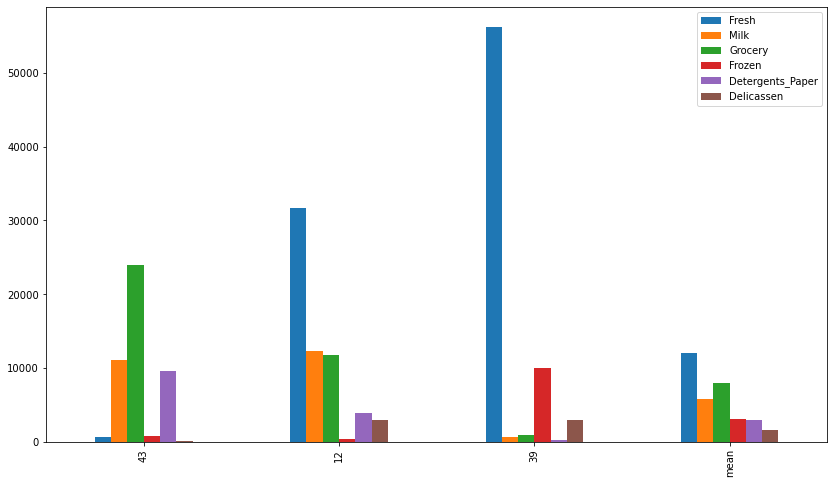

In [19]:
# Import Seaborn, a very powerful library for Data Visualisation
import seaborn as sns

# Get the means 
mean_data = data.describe().loc['mean', :]

# Append means to the samples' data
samples_bar = samples.append(mean_data)

# Construct indices
samples_bar.index = indices + ['mean']

# Plot bar plot
samples_bar.plot(kind='bar', figsize=(14,8))

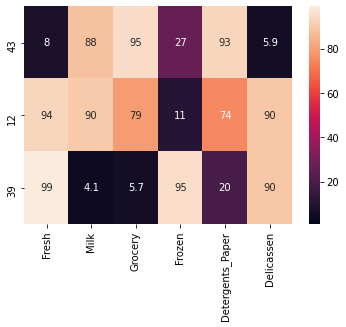

In [20]:
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)

# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map using the seaborn library
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

In [21]:
# Existing features
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [23]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [24]:
# Create list to loop through
dep_vars = list(data.columns)


# Create loop to test each feature as a dependent variable
for var in dep_vars:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([var], axis = 1)
    # Confirm drop
    # display(new_data.head(2))

    # Create feature Series (Vector)
    new_feature = pd.DataFrame(data.loc[:, var])
    # Confirm creation of new feature
    # display(new_feature.head(2))

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    # Instantiate
    dtr = DecisionTreeRegressor(random_state=42)
    # Fit
    dtr.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    # Returns R^2
    score = dtr.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(var, score))

R2 score for Fresh as dependent variable: -0.3857497102040739
R2 score for Milk as dependent variable: 0.15627539501732113
R2 score for Grocery as dependent variable: 0.6818840085440834
R2 score for Frozen as dependent variable: -0.21013589012491396
R2 score for Detergents_Paper as dependent variable: 0.27166698062685013
R2 score for Delicassen as dependent variable: -2.254711537203931


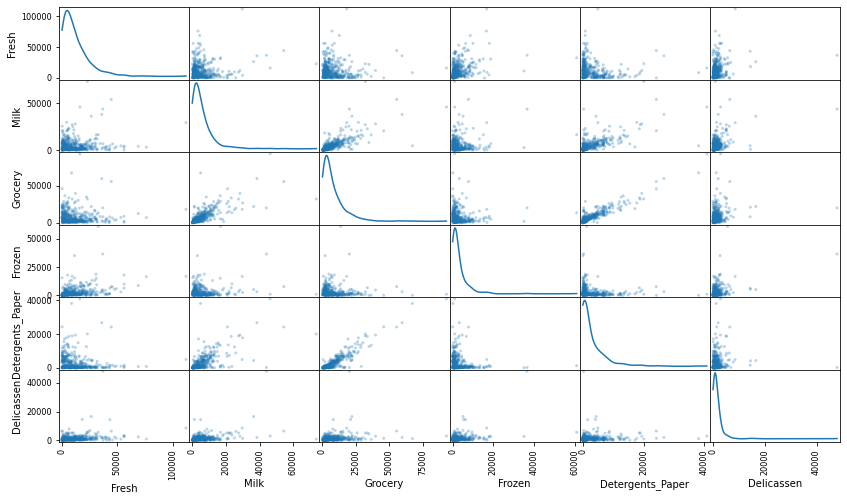

In [27]:
from pandas.plotting import scatter_matrix

# Produce a scatter matrix for each pair of features in the data
scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

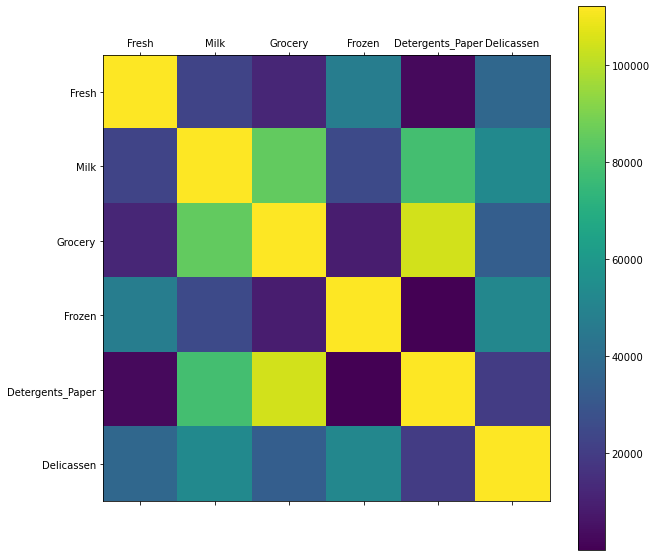

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);


plot_corr(data)

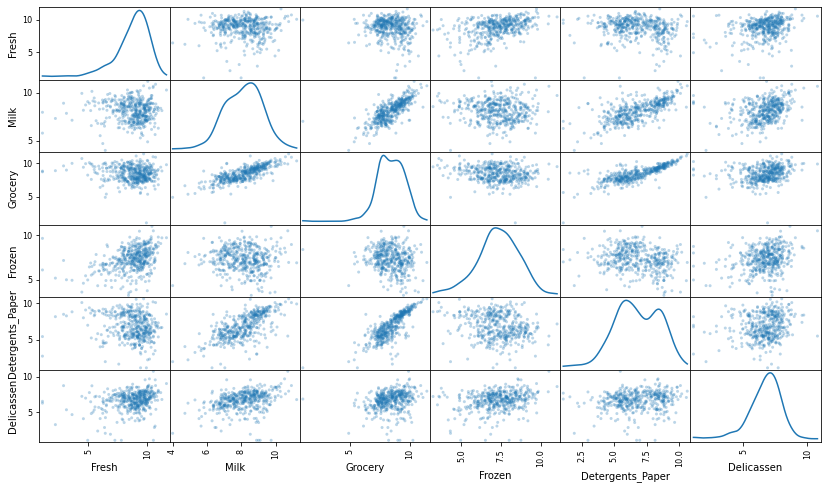

In [34]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

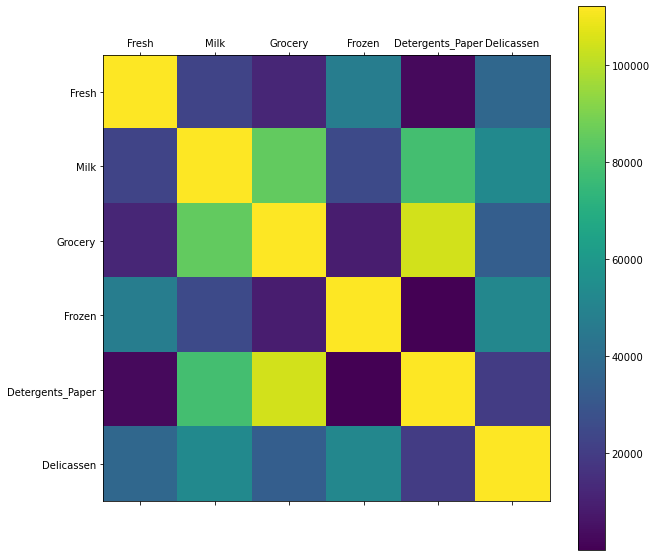

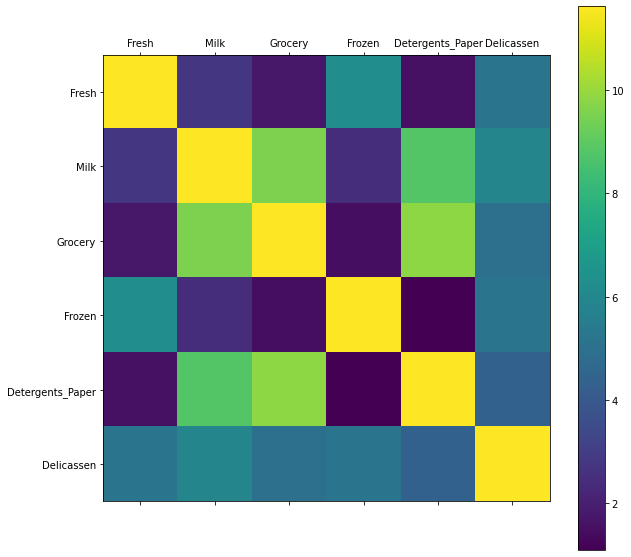

In [35]:
plot_corr(data)
plot_corr(log_data)

In [36]:
# This is how np.percentile would work
# np.percentile[series, percentile]
np.percentile(data.loc[:, 'Milk'], 25)

1533.0

In [40]:
import itertools
# Select the indices for data points you wish to remove
outliers_lst  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.columns:
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data.loc[:, feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data.loc[:, feature], 75)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)

    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))

    # The tilde sign ~ means not
    # So here, we're finding any points outside of Q1 - step and Q3 + step
    outliers_rows = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), :]
    # display(outliers_rows)

    outliers_lst.append(list(outliers_rows.index))

outliers = list(itertools.chain.from_iterable(outliers_lst))

# List of unique outliers
# We use set()
# Sets are lists with no duplicate entries
uniq_outliers = list(set(outliers))

# List of duplicate outliers
dup_outliers = list(set([x afor x in outliers if outliers.count(x) > 1]))

print ('Outliers list:\n', uniq_outliers)
print ('Length of outliers list:\n', len(uniq_outliers))

print ('Duplicate list:\n', dup_outliers)
print ('Length of duplicates list:\n', len(dup_outliers))

# Remove duplicate outliers
# Only 5 specified
good_data = log_data.drop(log_data.index[dup_outliers]).reset_index(drop = True)

# Original Data 
print ('Original shape of data:\n', data.shape)
# Processed Data
print ('New shape of data:\n', good_data.shape)

SyntaxError: invalid syntax (<ipython-input-40-3bbd0f4aa30a>, line 34)